# Project: Customer classification of wholesale customers

>  ## Introduction

The wholesale customers data is available on the UCI Machine Learning Repository. The dataset contains eight  columns and contains information on the customers of a  wholesale distributor, operating in different regions.The goal of this project is to apply supervised  machine learning classification techniques to classify  customer types.

 **Import Libraries**

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Getting Data**

In [3]:
#Getting wholesale customers dataset form UCI Machine Learning Repository
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

> # Data Exploratrion

In this section, we will use visualizations and code to understand what is in a dataset and the characteristics of the data, and a statistical description of the overall dataset.In data exploration step ,it is always good to start checking the dimension of the dataset.

In [4]:
##Checking dimension of the dataset
df.shape

(440, 8)

In [5]:
#Previewing the dataset
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories.

Features

* Fresh: annual spending (m.u.) on fresh products (Continuous);

* Milk: annual spending (m.u.) on milk products (Continuous);

* Grocery: annual spending (m.u.) on grocery products (Continuous);

* Frozen: annual spending (m.u.) on frozen products (Continuous);

* Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous);

* Delicatessen: annual spending (m.u.) on and delicatessen products (Continuous);

* Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)

* Region: {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal)

In [6]:
#Getting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


- all data types are numeric

**Check for missing values**

In [7]:
# Check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

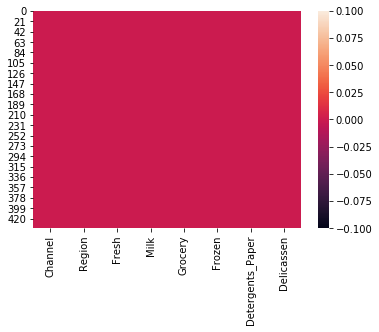

In [8]:
#Visualize for missing values by using heatmap 
sns.heatmap(df.isnull())

In [9]:
#Display Statistical Summary of the dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
#Checking 'Channel' Frequency
print(df.groupby('Channel').size())

Channel
1    298
2    142
dtype: int64


In [11]:
#Checking 'Region' Frequency
print(df.groupby('Region').size())

Region
1     77
2     47
3    316
dtype: int64


> # Data Preparation

In this project I will use only one label data('Channel') to classify customer types

In [12]:
del df['Region']

In [13]:
#Checking dataset after delete 'Region' column
df.head(5)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


**Visualize correlation of data**

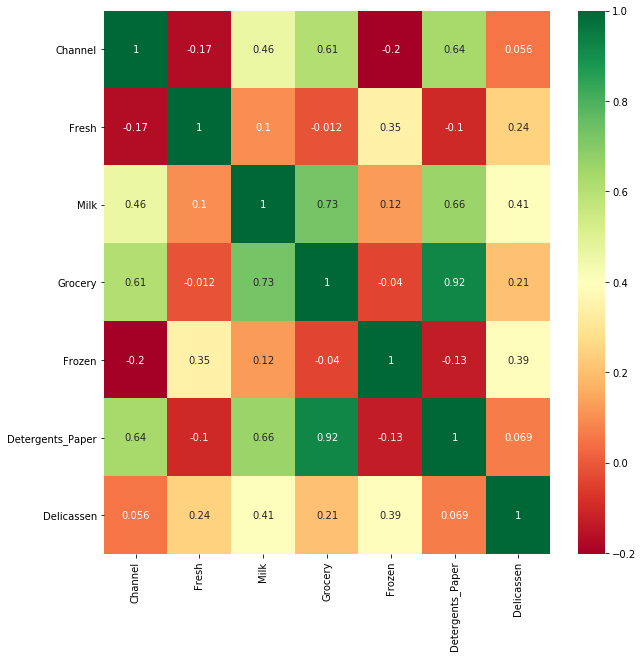

In [14]:
#Checking correlation between features and label data by using correlation heat map
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In this correlation matrix,

we can see our label data 'Channel' is a strongly correlated with the ‘Grocery’ and ‘Detergent_paper’ features. 

The features between ‘Grocery’ and ‘Detergent_paper’ are strongly correlated each other.

The features ‘Grocery’ and ‘Milk’ also show a good degree of correlation.

In [15]:
#Convert 'Channel' to categorical variable for further analysis
df['Channel'].replace([1,2],['HoReCa','Retail'],inplace=True)

In [16]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Visualize Feature Distributions**

In order to understand better our dataset, we will display a scatter matrix of every product feature.
The product features that show a correlation in the scatter matrix will be relevant to predict others.

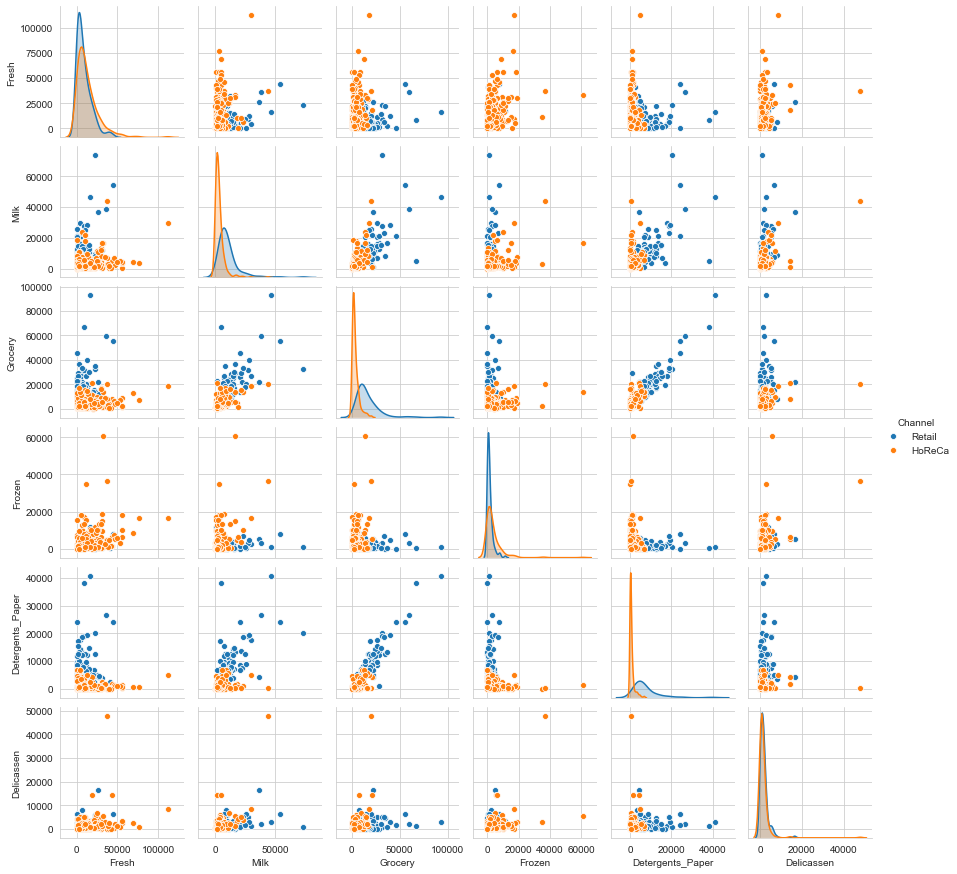

In [17]:
#check for diffencence speration between all features by using pair plot
plt.close() 
sns.set_style('whitegrid')
sns.pairplot(df,hue='Channel',height=2)
plt.show()

Using the pair plot as a references, 
we can infer the following:
- Data is not normally distributed, 

- In most plots, most data points lie near the origin which shows little correlation between them.

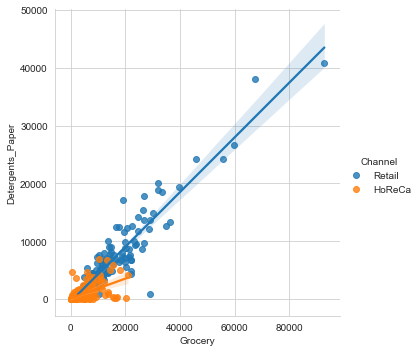

In [73]:
sns.lmplot(x="Grocery", y="Detergents_Paper", hue="Channel", data=df); 

- The pair of features with the highest correlation are "Detergents_Paper" and "Grocery" which intuitively makes sense as many people shop for both when they go grocery shopping.

**Separate the Features and the Label**

In [27]:
#df_features=df.loc[:,['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]  
#df_features.shape

(440, 6)

(440, 1)

**Split the dataset into training and testing datasets**

In [21]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_features,df_label, test_size=0.2)

In [64]:
from sklearn import model_selection
array = df.values
X = array[:,1:8]
y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [61]:
X

array([[12669, 9656, 7561, 214, 2674, 1338],
       [7057, 9810, 9568, 1762, 3293, 1776],
       [6353, 8808, 7684, 2405, 3516, 7844],
       ...,
       [14531, 15488, 30243, 437, 14841, 1867],
       [10290, 1981, 2232, 1038, 168, 2125],
       [2787, 1698, 2510, 65, 477, 52]], dtype=object)

In [63]:
Y[0]

'Retail'

> # Model Building & Evaluation

In this section, we will use three different type of classifiers and will choose the best classifier to classify customer types.

Those three classifiers are

- Gradient Boosting Classifier
- Decision Tree Classifier 
- Random Forest Classifier 

In [54]:
models = []

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble

In [74]:
models.append(('DecisionTreeClassifier', tree.DecisionTreeClassifier()))
models.append(('RandomForestClassifier', ensemble.RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GradientBoostingClassifier', ensemble.GradientBoostingClassifier()))

In [65]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=(None)) 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())    
    print(msg)

DecisionTreeClassifier: 0.872302 (0.045980)
RandomForestClassifier: 0.908968 (0.043851)
KNeighborsClassifier: 0.894683 (0.049647)
GradientBoostingClassifier: 0.903492 (0.043999)


### Perform Classification Using Gradient Boosting Classifier

In [75]:
from sklearn import ensemble

gb_clf = ensemble.GradientBoostingClassifier()

In [23]:
# Use GridSerchCV to search the best parameters for Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV

In [24]:
#Declare parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
    'min_samples_leaf': [1,3],
    'learning_rate': [0.1, 0.05],
    'max_features': [1.0, 0.3],
    'loss': ['ls', 'huber']
}

In [25]:
#Define the grid search and run with four cpus in parallel.
gs_cv = GridSearchCV(gb_clf, param_grid, n_jobs=8, verbose=100)

In [26]:
# Run the grid search with training data
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,

Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    1.9s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done  18 tasks      | elapsed:    1.9

Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).[Parallel(n_jobs=8)]: Done  37 tasks      | elapsed:    2.1s

Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done  38 tasks      | elapsed:    2.1s


Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done  62 tasks      | elapsed:    2.3s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (sha

Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
[Parallel(n_jobs=8)]: Done 104 tasks      | elapsed:    2.5s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
Pickling array (shape

Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    2.7s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    2.7

Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
[Parallel(n_jobs=8)]: Done 281 tasks      | elapsed:    2.9s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
[Parallel(n_jobs=8)]: Done 282 tasks      | elapsed:    2.9

Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(281,), dtype=int32).
Pickling array (shape=(71,), dtype=int32).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(1, 352), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (shape=(282,), dtype=int32).
Pickling array (shape=(70,), dtype=int32).
[Parallel(n_jobs=8)]: Done 303 tasks      | elapsed:    3.1s
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(352,), dtype=int64).
Pickling array (shape=(6, 352), dtype=int64).
Pickling array (shape=(6,), dtype=object).
Pickling array (shape=(1,), dtype=object).
Pickling array (

C:\Users\tzwth\Anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Loss 'ls' not supported. 

In [29]:
#Printing best parameters
print(gs_cv.best_params_)

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 1, 'n_estimators': 50}


**Feature importance**

In [76]:
#Visualize impotance features
feat_importances=pd.Series(gb_clf.feature_importances_,index=df_features.columns)
feat_importances.nlargest(6).plot(kind="barh")
plt.show()

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
print(gb_clf.feature_importances_)

[0.04236188 0.08981583 0.064672   0.04294902 0.73686847 0.02333281]


- The Feature "Detergent_Paper" has been given the highest importance score and "Fresh" has given the lowest impotance among all features

In [66]:
X = array[:,2:8]

In [67]:
X[0]

array([9656, 7561, 214, 2674, 1338], dtype=object)

In [ ]:
#Exclude 'Fresh' and 'Frezon' in features
#df_features=df.loc[:,['Milk','Grocery','Detergents_Paper','Delicassen']]  
#df_features.shape

In [68]:
gb_clf = ensemble.GradientBoostingClassifier(learning_rate= 0.1,  max_depth= 4, 
                                             max_features= 1.0, min_samples_leaf= 1, n_estimators= 50)

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
gb_clf.score(X_train, y_train)

0.9971590909090909

In [70]:
gb_clf.score(X_test, y_test)

0.9772727272727273

In [72]:
gb_clf.predict(X_test)

array(['Retail', 'Retail', 'HoReCa', 'HoReCa', 'Retail', 'HoReCa',
       'HoReCa', 'Retail', 'Retail', 'HoReCa', 'Retail', 'HoReCa',
       'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'HoReCa',
       'Retail', 'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'Retail',
       'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'Retail', 'Retail',
       'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa',
       'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'HoReCa', 'HoReCa',
       'Retail', 'HoReCa', 'Retail', 'HoReCa', 'Retail', 'HoReCa',
       'HoReCa', 'HoReCa', 'Retail', 'Retail', 'HoReCa', 'Retail',
       'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'HoReCa',
       'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'Retail', 'HoReCa',
       'Retail', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa',
       'Retail', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa', 'HoReCa',
       'HoReCa', 'Retail', 'HoReCa', 'HoReCa', 'HoReCa', 'Retail',
       'HoReCa', 'Retail', 'Retail', 'HoReCa'], dtype=object)

- This accuracy is we will use this accuracy as baseline accuracy to improve my model. 

In [36]:
df_features.loc[0,:]

Fresh               12669
Milk                 9656
Grocery              7561
Frozen                214
Detergents_Paper     2674
Delicassen           1338
Name: 0, dtype: int64

In [37]:
#Retrain with best params and four importance features
gb_clf = ensemble.GradientBoostingClassifier(learning_rate= 0.1,  max_depth= 4, 
                                             max_features= 1.0, min_samples_leaf= 1, n_estimators= 50)

gb_clf.fit(X_train, y_train)

C:\Users\tzwth\Anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Measuring Accuracy (Best Params and Four Importance Features)**

In [ ]:
gb_clf.score(X_train, y_train)

In [38]:
gb_clf.score(X_test, y_test)

0.9204545454545454

In [ ]:
#Retrain again with n_estimators=100 and four importance features
gb_clf = ensemble.GradientBoostingClassifier(learning_rate= 0.1,  max_depth= 4, 
                                             max_features= 1.0, min_samples_leaf= 1, n_estimators= 100)

gb_clf.fit(X_train, y_train)

**Measuring Accuracy (n_estimators=100 and Four Importance Features)**

In [39]:
gb_clf.score(X_train, y_train)

1.0

In [40]:
gb_clf.score(X_test, y_test)

0.9204545454545454

### Perform Classification Using Decision Tree Classifier

In [41]:
from sklearn import tree

#train with defult paramaters
dt_clf = tree.DecisionTreeClassifier() 

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Measuring Accuracy(Defult Parametrs)**

In [42]:
dt_clf.score(X_train, y_train)

1.0

In [43]:
dt_clf.score(X_test, y_test)

0.9090909090909091

In [44]:
from sklearn import tree
#Retrain with (max_depth=5)
dt_clf = tree.DecisionTreeClassifier(max_depth=5)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
dt_clf.score(X_train, y_train)

0.9715909090909091

In [46]:
dt_clf.score(X_test, y_test)

0.9318181818181818

### Perform Classification Using Random Forest Classifier

In [47]:
from sklearn import ensemble
#train with defult parameters
rf_clf = ensemble.RandomForestClassifier()

rf_clf.fit(X_train, y_train)

C:\Users\tzwth\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Measuring Accuracy (Defult paprmeters)**

In [48]:
rf_clf.score(X_train, y_train)

1.0

In [49]:
rf_clf.score(X_test, y_test)

0.9204545454545454

In [50]:
from sklearn import ensemble

#retrain with (n_estimators=100)
rf_clf = ensemble.RandomForestClassifier(n_estimators= 100)

rf_clf.fit(X_train, y_train)

C:\Users\tzwth\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Measuring Accuracy (n_estimators=100)**

In [51]:
rf_clf.score(X_train, y_train)

1.0

In [52]:
rf_clf.score(X_test, y_test)

0.9204545454545454

In [53]:
pre=[12669,
9656,
7561,
214,
2674,
1338]
pre1=[pre]
rf_clf.predict(pre1)

array(['Retail'], dtype=object)

Note :Ramdom Forest Classifier is the best calssifier

> # Assessment of the Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make predictions on validation dataset
rf_clf = ensemble.RandomForestClassifier(n_estimators=50)

rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification report:")
print(classification_report(y_test, predictions))

> # Results and Conclusion

In this project, we implement three different algorithms(Gradient Boosting ,Decision Tree and Random Forest) with Python and Scikit-Learn to classify the customers from two different channels as HoReCa (Hotel/Retail/Café) customers or Retail customers.

The y labels contain values as 1 and 2. We have converted them into HoReCa and Retail for further analysis.

1)Gradient Boosting Classifier
 - I'd used GridSeachCV (to get best parameters) and all features to train the model
 - I'd adjusted one of hyper parameter and retrain my model with Five Importance to get highest accuracry scores
In Gradient Boosting Classifier
 - The Highest Accuracy of Training Data is 1.0
 - The Highest Accuracy of Testing Data is 0.886
 
2)Decision Tree Classifier
 - I'd trained my model with defult parameters 
 - I'd adjusted hypermeter (max_depth=5) and retrained my model
In Decision Tree Classifier
 - The Highest Accuracy of Training Data is 0.965
 - The Highest Accuracy of Testing Data is 0.897

3)Random Forest Classifier
 - I'd trained my model with defult parameters
 - I'd adjusted hypermeter (n_estimator) and retrained my model
In Random Forest Classifier
 - The Highest Accuracy of Training Data is 1.0
 - The Highest Accuracy of Testing Data is 0.897

##### Ramdom Forest Classifier is the best classifier for this project##

# Reference

The ideas and concepts in this project are taken from the following websites -
Algorithms
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

 - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
 - https://en.wikipedia.org/wiki/F1_score
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
 - http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
 - https://en.wikipedia.org/wiki/Confusion_matrix
 - https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/ 
 - https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance
 

Table of Contents
1 Introduction to XGBoost Algorithm
1.1 Evolution of tree-based algorithm
1.2 Main features of XGBoost
2 Bagging vs Boosting
2.1 Bagging
2.2 Boosting
3 XGBoost algorithm intuition
3.1 Gradient Boosting
3.2 Gradient Boosted Trees
3.3 Extreme Gradient Boosting (XGBoost)
4 Implementing XGBoost in Python
4.1 Load libraries
4.2 Read dataset
4.3 EDA
4.3.1 Shape of dataset
4.3.2 Preview dataset
4.3.3 Summary of dataset
4.3.4 Summary statistics of dataset
4.3.5 Check for missing values
4.4 Declare feature vector and target variable
4.5 Split data into separate training and test set
4.6 Train the XGBoost Classifier
4.7 Make predictions with XGBoost Classifier
4.8 Check accuracy score
5 k-fold Cross Validation using XGBoost
6 Visualizing Feature Importance with XGBoost
7 Results and Conclusion
8 References